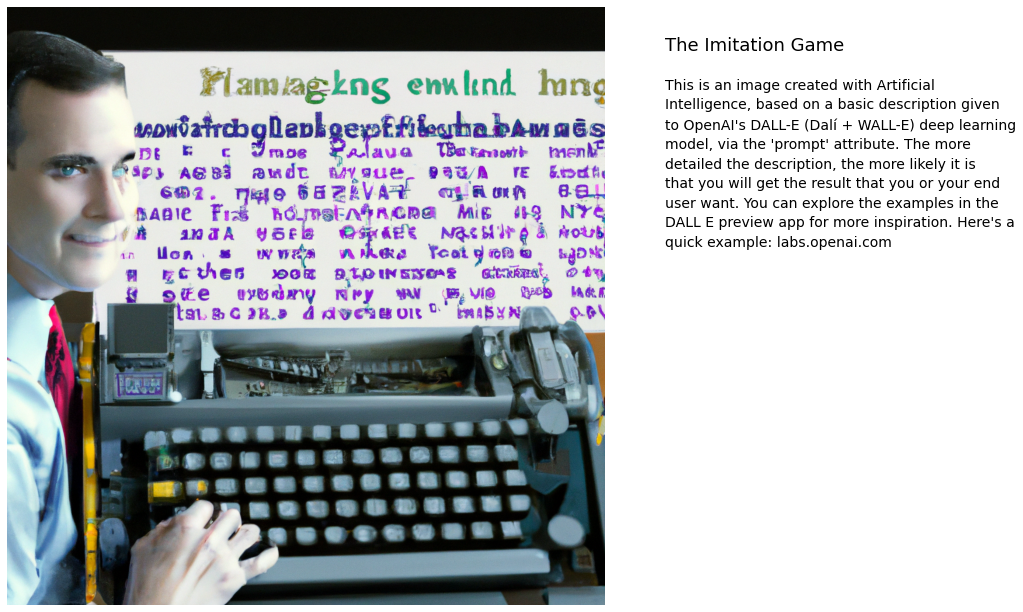

In [13]:
import openai
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import textwrap


class DALLEImage:
    def __init__(self, api_key):
        openai.api_key = api_key
        
    def generate_image(self, prompt, num_images=1, size="1024x1024"):
        response = openai.Image.create(
            prompt=prompt,
            n=num_images,
            size=size
        )
        return response['data'][0]['url']
    
    def plot_image_with_text(self, image_url, main_text, description):
        # Use the requests library to load the image from the URL
        response = requests.get(image_url)
        image = plt.imread(BytesIO(response.content))

        # Create a subplot and adjust the size of the image
        fig, ax = plt.subplots(figsize=(15, 11))
        ax.imshow(image)
        ax.axis('off')

        # Split the text into multiple lines with a maximum width of 50 characters
        wrapped_description = textwrap.wrap(description, width=50)

        # Join lines with newlines
        formatted_description = '\n'.join(wrapped_description)
        plt.text(1.1, 0.95, main_text, fontsize=18, ha='left', va='top', transform=ax.transAxes)
        plt.text(1.1, 0.88, formatted_description, fontsize=14, ha='left', va='top', 
                 linespacing=1.5, transform=ax.transAxes)
        plt.show()
        

dalle = DALLEImage(api_key="Your_OpenAI_API_KEY")

prompt = "Alan Turing programming in Python " + \
         "Programming Language, to decipher the messages " + \
         "created by the Enigma machine"

image_url = dalle.generate_image(prompt=prompt, size="1024x1024", num_images=2)

main_text = "The Imitation Game"
description = """This is an image created with Artificial Intelligence, 
based on a basicdescription given to OpenAI's DALL-E (Dalí + WALL-E) deep learning model, 
via the 'prompt' attribute.The more detailed the description, the more likely it is that 
you will get the result that you or your end user want. You can explore the examples in 
the DALL E preview app for more inspiration. Here's a quick example: labs.openai.com"""

dalle.plot_image_with_text(image_url=image_url, main_text=main_text, description=description)

